<a href="https://colab.research.google.com/github/pchunter97/Clasificador/blob/main/CNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CARGA DE IMAGENES

In [1]:
import tensorflow as tf
path='drive/MyDrive/BDC/DATASET/TRAIN'
 
x_train = tf.keras.preprocessing.image_dataset_from_directory(path,validation_split=0.25, subset="training",seed=1,image_size=(256,256), batch_size=128,label_mode='categorical')
x_val = tf.keras.preprocessing.image_dataset_from_directory(path,validation_split=0.25,subset="validation",seed=1,image_size=(256,256), batch_size=128,label_mode='categorical')

Found 22564 files belonging to 2 classes.
Using 16923 files for training.
Found 22564 files belonging to 2 classes.
Using 5641 files for validation.


In [2]:
path_test ='drive/MyDrive/BDC/DATASET/TEST'
x_test=tf.keras.preprocessing.image_dataset_from_directory(path_test,seed=1, image_size=(256,256),batch_size=249, label_mode='categorical')

Found 2513 files belonging to 2 classes.


In [3]:
x_train.class_names

['O', 'R']

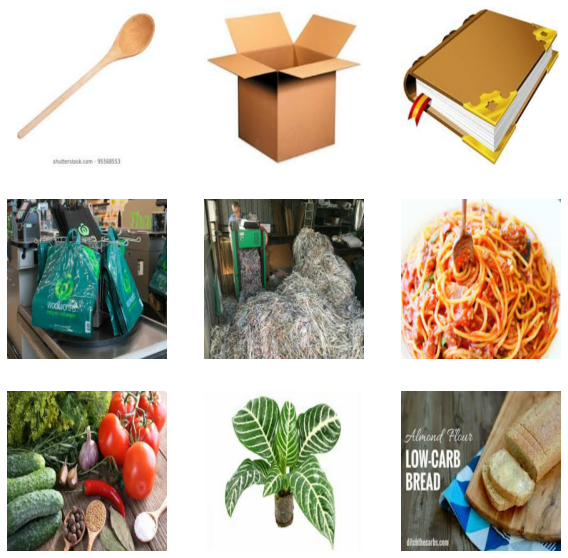

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
for images, labels in x_train.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")


In [5]:
normalizacion=tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
x_train_norm = x_train.map(lambda x,y: (normalizacion(x),y))

In [6]:
x_val_norm=x_val.map(lambda x,y: (normalizacion(x),y))

In [7]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from keras.utils import np_utils 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

In [8]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
model = Sequential() #Modelo secuencial por el apilamiento de capas
#Primera capa convolucional con 32 filtros, un kernel de 9x9, una función de activación Relu, tamaño de la entrada y 3 canales RGB
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2))) #Selecciona 4 valores y saca el máximo de mapa de características
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(128, 128, 32)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(64, 64, 32)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 32)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu')) #Fully connect
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9

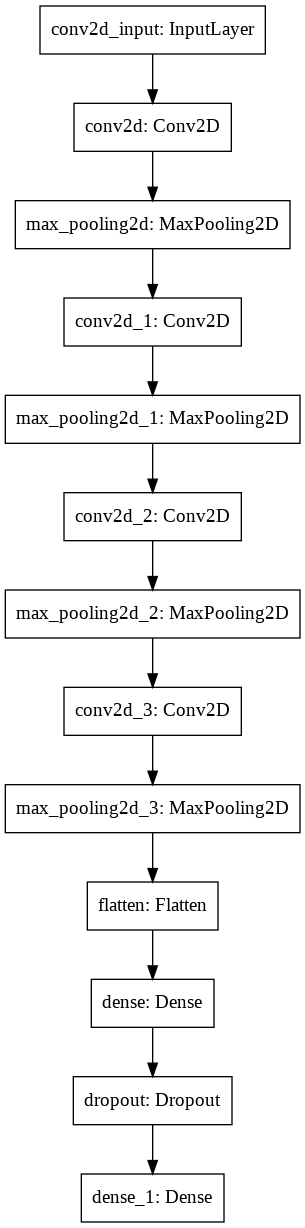

In [9]:
plot_model(model)

In [10]:
model.compile(optimizer="sgd", , loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='drive/MyDrive/BDC/cnn.model.best.hdf5', verbose=1, save_best_only=True)

In [12]:
history = model.fit(x_train_norm,validation_data=x_val_norm,epochs=20,callbacks=[checkpointer],verbose=1) #18052/249

Epoch 1/20
133/133 [==============================] - 1702s 13s/step - loss: 0.5788 - accuracy: 0.7025 - val_loss: 0.4563 - val_accuracy: 0.7937

Epoch 00001: val_loss improved from inf to 0.45628, saving model to drive/MyDrive/BDC/cnn.model.best.hdf5
Epoch 2/20
133/133 [==============================] - 1323s 10s/step - loss: 0.4513 - accuracy: 0.7937 - val_loss: 0.5514 - val_accuracy: 0.7433

Epoch 00002: val_loss did not improve from 0.45628
Epoch 3/20
133/133 [==============================] - 1328s 10s/step - loss: 0.4298 - accuracy: 0.8069 - val_loss: 0.4350 - val_accuracy: 0.8108

Epoch 00003: val_loss improved from 0.45628 to 0.43497, saving model to drive/MyDrive/BDC/cnn.model.best.hdf5
Epoch 4/20
133/133 [==============================] - 1314s 10s/step - loss: 0.4205 - accuracy: 0.8140 - val_loss: 0.4741 - val_accuracy: 0.7859

Epoch 00004: val_loss did not improve from 0.43497
Epoch 5/20
133/133 [==============================] - 1328s 10s/step - loss: 0.4141 - accuracy: 0.

 La accuracy durante la prueba es 83.6672% 


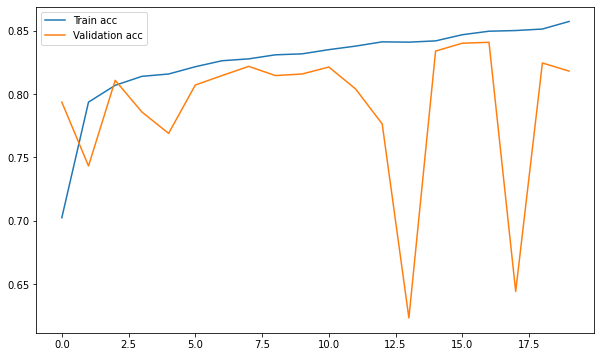

In [13]:
acc = model.evaluate(x_train, verbose=0)
print(' La accuracy durante la prueba es %.4f%% ' % (acc[1] * 100.0))
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

#Pruebas

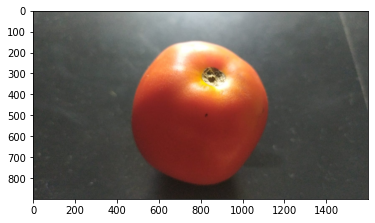

Residuo: Organico


0

In [1]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as img
 
longitud, altura = 256, 256
modelo = 'drive/MyDrive/BDC/cnn.model.best.hdf5'
cnn = load_model(modelo)
 
def predict(file):
 
  image = img.imread(file)
  plt.imshow(image, cmap=None)
  plt.show()
 
  x = load_img(file, target_size=(longitud, altura))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = cnn.predict(x)
  result = array[0]
  answer = np.argmax(result)
  if answer == 0:
    print("Residuo: Organico")
  elif answer == 1:
    print("Residuo: Inorganico")
 
  return answer
 
predict('drive/MyDrive/BDC/DATASET/UPLOADED/tom2.jpg')